The Goal 

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

check out more  LendingClub data sets on Kaggle.com

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',
                        index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
#  create a function to help read each col name and its Description 
def feature_information(col_name):
    print(data_info.loc[col_name]['Description'])
    

In [5]:
feature_information('installment')

The monthly payment owed by the borrower if the loan originates.


In [6]:
# Loading the Dataset. going import some libraries
import numpy as np 
import matplotlib.pyplot as mlp
import seaborn as sb

In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()
feature_information('term')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

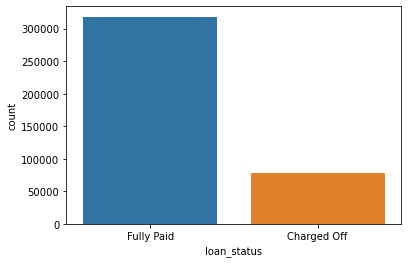

In [9]:
#  Exploratory Data Analysis
sb.countplot(x='loan_status',data=df)

(0.0, 45000.0)

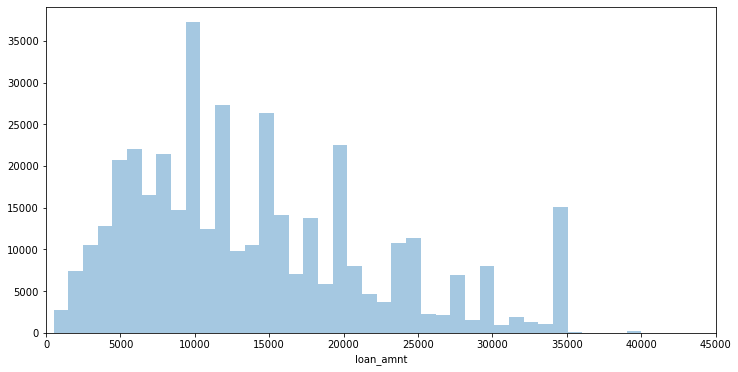

In [10]:
# Histogram of loan amount column
mlp.figure(figsize=(12,6))
sb.distplot(df['loan_amnt'], kde=False , bins =40)
mlp.xlim(0,45000)

In [11]:
# Calculate correlation between all continuous numeric variables.
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

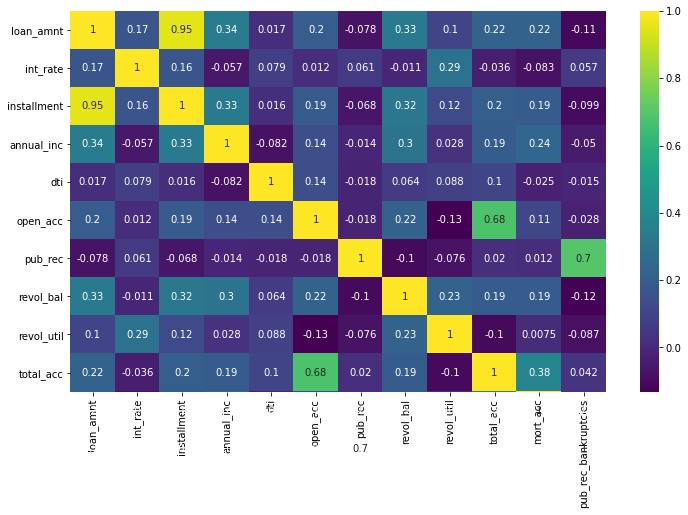

In [12]:
# Visualize the data using heat map 
mlp.figure(figsize=(12,7))
sb.heatmap(df.corr(), annot=True , cmap='viridis')
mlp.ylim(10, 0)

In [13]:
feature_information('installment')

The monthly payment owed by the borrower if the loan originates.


In [14]:
feature_information('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


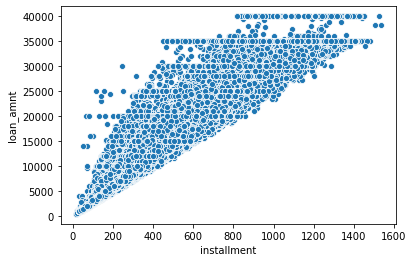

In [15]:
sb.scatterplot(x='installment' , y='loan_amnt', data=df)

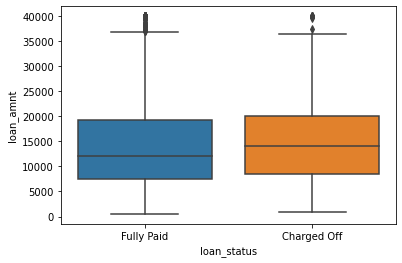

In [16]:
sb.boxplot(x='loan_status' , y='loan_amnt' , data=df)

In [17]:
#  I will now calulate the summary statistics for the loan amount
# , grouped by the loan status.

df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
# Explore the Grade and SubGrade columns that Landing Club attributes to the loans 
# df.head()
sorted(df['grade'].unique())


['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [20]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [21]:
df.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


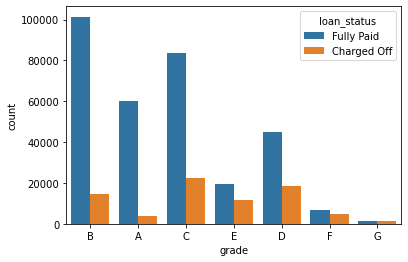

In [22]:
# count plot adding in hue to look at the loan statues 
sb.countplot(x='grade', data=df , hue='loan_status')

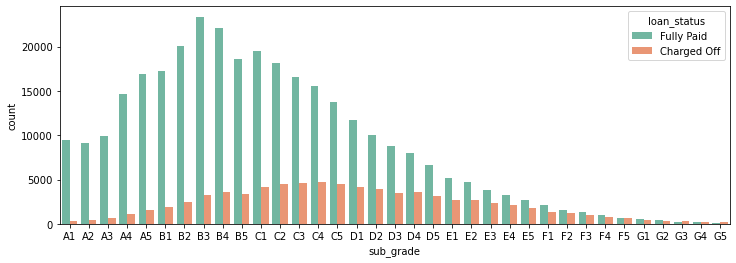

In [23]:
mlp.figure(figsize=(12,4))
subgrade_neworder = sorted(df['sub_grade'].unique())
sb.countplot(x='sub_grade', data=df , hue='loan_status',
             order=subgrade_neworder , palette='Set2')

In [24]:
# note - F1-G5 loans dont get paid back!!!
investigate_fandg = df[(df['grade']=='G') | (df['grade']=='F')]


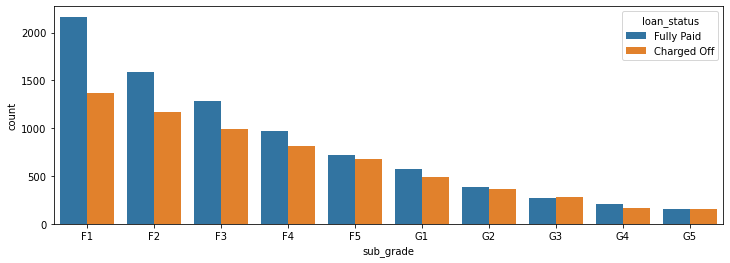

In [25]:
mlp.figure(figsize=(12,4))

subgrade_neworder = sorted(investigate_fandg['sub_grade'].unique())
sb.countplot(x='sub_grade',
data=investigate_fandg, order= subgrade_neworder, hue='loan_status')

In [26]:
# note create a new col for fully paid  and charge off 
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [27]:
df['loan_repaid'] = df['loan_status'].map(
{'Fully Paid':1, 'Charged Off' :0})

In [28]:
df[['loan_repaid' , 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


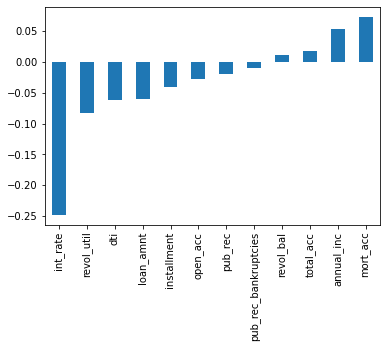

In [29]:
# bar plot showing the correlation of the numeric features to the new loan_repaid column.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Data Processing 

In [30]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [31]:
# looks like i have some missing data in the dataset 
len(df)

396030

In [32]:
# displays the total count of missing values per column.

df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [33]:
#  note - i will need to  convert this Series to be in term of percentage of the total DataFrame
100 * df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [34]:
# possibly have to drop a col 
feature_information('emp_title')
print('\n')
feature_information('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [35]:
df['emp_title'].nunique()

173105

In [36]:
df['emp_title'].value_counts()

Teacher                                  4389
Manager                                  4250
Registered Nurse                         1856
RN                                       1846
Supervisor                               1830
                                         ... 
24 Hour Fitness, Inc.                       1
Carolina Bone and Joint                     1
California Interscholastic Federation       1
Manheim Atlanta                             1
kroger company                              1
Name: emp_title, Length: 173105, dtype: int64

In [37]:
# too many unique job titles 
# to try to convert this to a dummy variable feature.

df = df.drop('emp_title', axis=1)

In [38]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [39]:
emp_length_order = [
    '< 1 year',
    '1 year', 
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years']

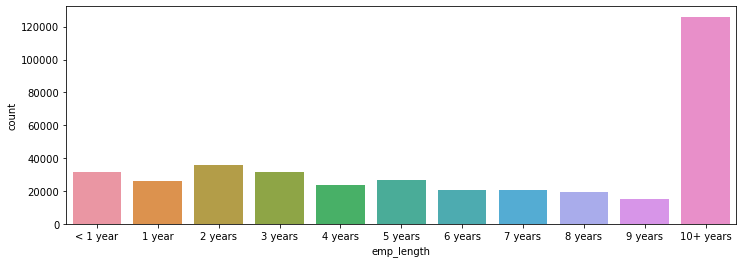

In [40]:
mlp.figure(figsize=(12,4))
sb.countplot(x='emp_length', data=df,order=emp_length_order)

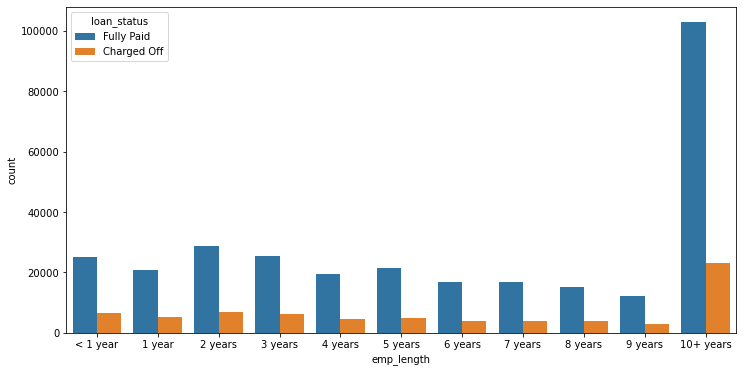

In [41]:
mlp.figure(figsize=(12,6))
sb.countplot(x='emp_length', data=df ,order = emp_length_order , hue='loan_status')

In [42]:
#still doesn't really inform me if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.

emp_co = df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']

In [43]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

In [44]:
emp_len = emp_co/emp_fp

In [45]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

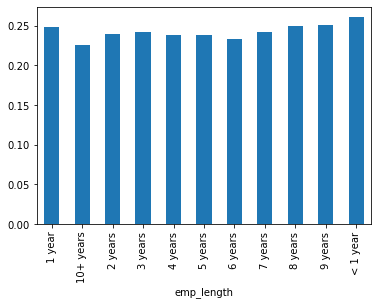

In [46]:
emp_len.plot(kind='bar')

In [47]:
# Charge off rates are extremely similar across all employment lengths. i will now drop the emp_lenght

df = df.drop('emp_length' , axis=1)

In [48]:
# check the Data to see if any is still missing.
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [49]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [50]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [51]:
df=df.drop('title', axis=1)

In [52]:
feature_information('mort_acc')

Number of mortgage accounts.


In [53]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [54]:
print("corrections with the mont_acc column")
df.corr()['mort_acc'].sort_values()

corrections with the mont_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [55]:
# using fillna
print('mean of mort_acc column per totle_acc')
df.groupby('total_acc').mean()['mort_acc']

mean of mort_acc column per totle_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [56]:
# fill in the missing mort_acc values based on their total_acc value.
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [57]:
total_acc_avg[2.0]

0.0

In [58]:
def fill_in_morgage(total_acc , mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [59]:
df['mort_acc']= df.apply( lambda x: fill_in_morgage(x['total_acc'],x['mort_acc']), axis=1)

In [60]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [61]:
# evol_util and the pub_rec_bankruptcies have missing data points
df = df.dropna()

In [62]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [63]:
#Categorical Variables and Dummy Variables

df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [64]:
# term feature
# Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().
df['term'].value_counts()



 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [65]:
# You can also use map()
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [66]:
df = df.drop('grade', axis=1)

In [67]:
# Convert the subgrade into dummy variables
subgrade_dum = pd.get_dummies(df['sub_grade'], drop_first=True)

In [68]:
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dum],axis=1)

In [69]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [70]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [71]:
# Convert columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them.
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)
df = df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1)
df = pd.concat([df,dummies],axis=1)

In [72]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [73]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = df.drop('home_ownership', axis=1)
df = pd.concat([df,dummies], axis=1)

In [74]:
#note -feature engineer a zip code column from the address in the data set.

df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [75]:
dummies= pd.get_dummies(df['zip_code'], drop_first=True)
df = df.drop(['zip_code', 'address'], axis=1)
df = pd.concat([df,dummies], axis=1)

In [76]:
# data leakage
df = df.drop('issue_d', axis=1)

In [77]:
# Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line', axis=1)

In [78]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [79]:
# Test Train Split 

from sklearn.model_selection import train_test_split

In [80]:
# drop the load_status column created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [81]:
df = df.drop('loan_status', axis=1)

In [82]:
# set up X and Y

X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [83]:
X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.20 , random_state=101)

In [84]:
# Normalizing the Data

#  Use a MinMaxScaler to normalize the feature data X_train and X_test.dont want data leakge from the test set so we only fit on the X_train data.


In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
X_train = scaler.fit_transform(X_train)

In [88]:
X_test = scaler.transform(X_test)

In [89]:
# Create  The model 

import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Activation , Dropout 
from tensorflow.keras.constraints import max_norm

In [91]:

# Build a sequential model that  will be trained on the data. 
#  unlimited options 
#  a model that goes 78 --> 39 --> 19--> 1 output neuron

model = Sequential()
# number of layers/neurons.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# note to self Remember to compile()






In [92]:
model = Sequential()
# note to self Remember to compile()

# input layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

# hidden layer 
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')



In [93]:
# Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting

model.fit(x=X_train,
          y=y_train,
          epochs=25,
         batch_size=256,
         validation_data=(X_test , y_test),
         )

Epoch 1/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.3004 - val_loss: 0.2653
Epoch 2/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2662 - val_loss: 0.2633
Epoch 3/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2632 - val_loss: 0.2627
Epoch 4/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2621 - val_loss: 0.2624
Epoch 5/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2611 - val_loss: 0.2617
Epoch 6/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2602 - val_loss: 0.2617
Epoch 7/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2602 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2594 - val_loss: 0.2617
Epoch 9/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2593 - val_loss: 0.2612
Epoch 10/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.258

In [94]:
# save our model
from tensorflow.keras.models import load_model


In [95]:
model.save('Timothy_Balch_project_loan_model.h5')

In [96]:
# Plot out the validation loss versus the training loss.
dataloss = pd.DataFrame(model.history.history)

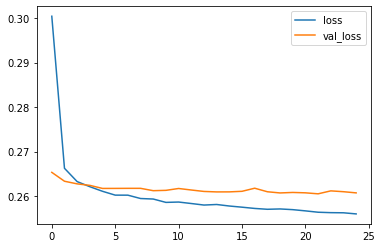

In [97]:
dataloss[['loss','val_loss']].plot()

In [98]:
# predictions from the X_test set and display a classification report and confusion matrix for the X_test set.
from  sklearn.metrics import classification_report, confusion_matrix 

In [99]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [103]:
import random
random.seed(10)
random_ind = random.randint(0,len(df))

new_customer= df.drop('loan_repaid', axis=1).iloc[random_ind]
new_customer

loan_amnt            24000.00
term                    36.00
int_rate                 6.49
installment            735.47
annual_inc          150000.00
                      ...    
48052                    0.00
70466                    0.00
86630                    0.00
93700                    0.00
earliest_cr_year      2006.00
Name: 300203, Length: 78, dtype: float64

In [104]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]], dtype=int32)

In [105]:
#  check, did this person actually end up paying back their loan
df.iloc[random_ind]['loan_repaid']

1.0